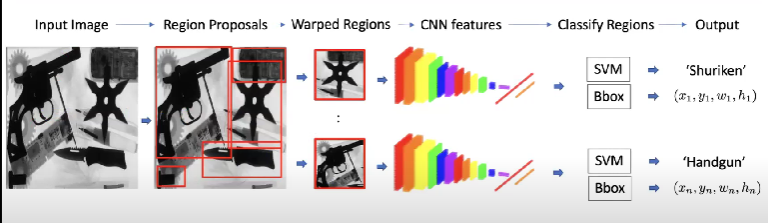

In [ ]:
!nvidia-smi

Sat Jul 15 16:52:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GV4KxNTY3qzci19mq2xO")
project = rf.workspace("academico-elrrs").project("football-players-py3lp")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.135, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to football-players-1 in yolov8:: 100%|██████████| 522/522 [00:00<00:00, 1176.39it/s]


Custom Training

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=25 \
imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 162MB/s]
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/football-players-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch180.jpg
confusion_matrix.png				    train_batch181.jpg
events.out.tfevents.1689439966.50772cec0d5e.4173.0  train_batch182.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


/content


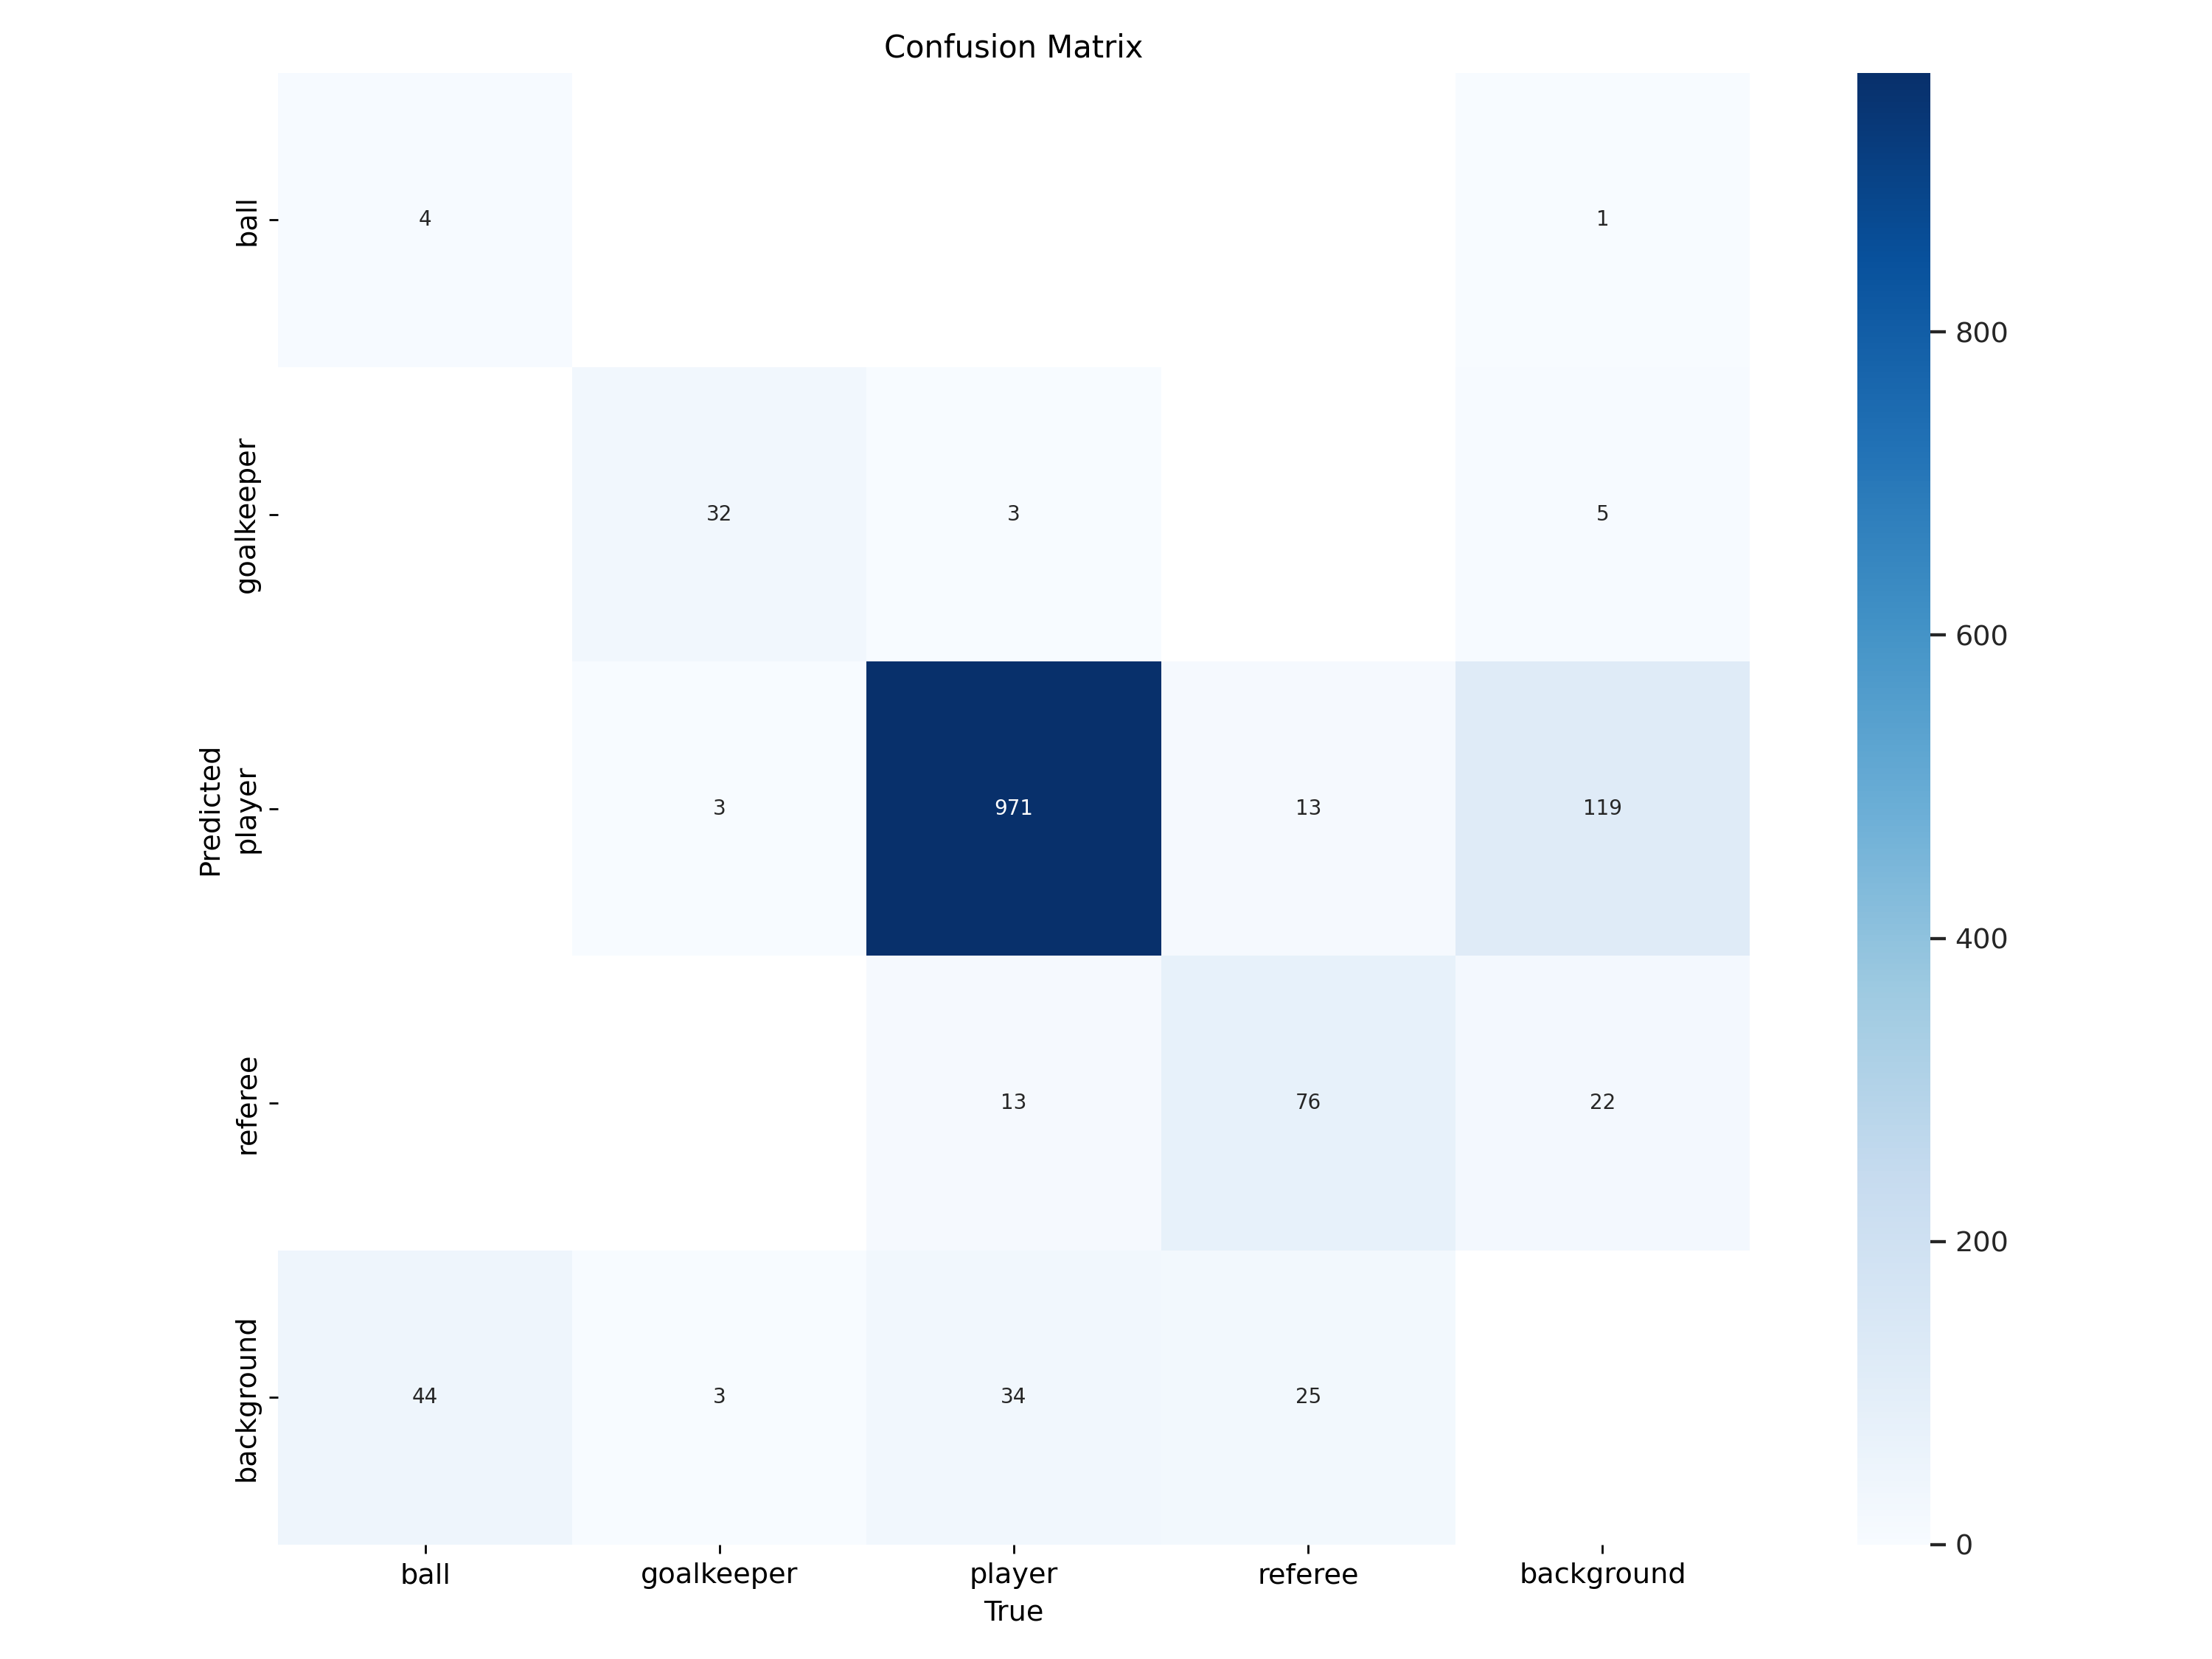

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width =600)

/content


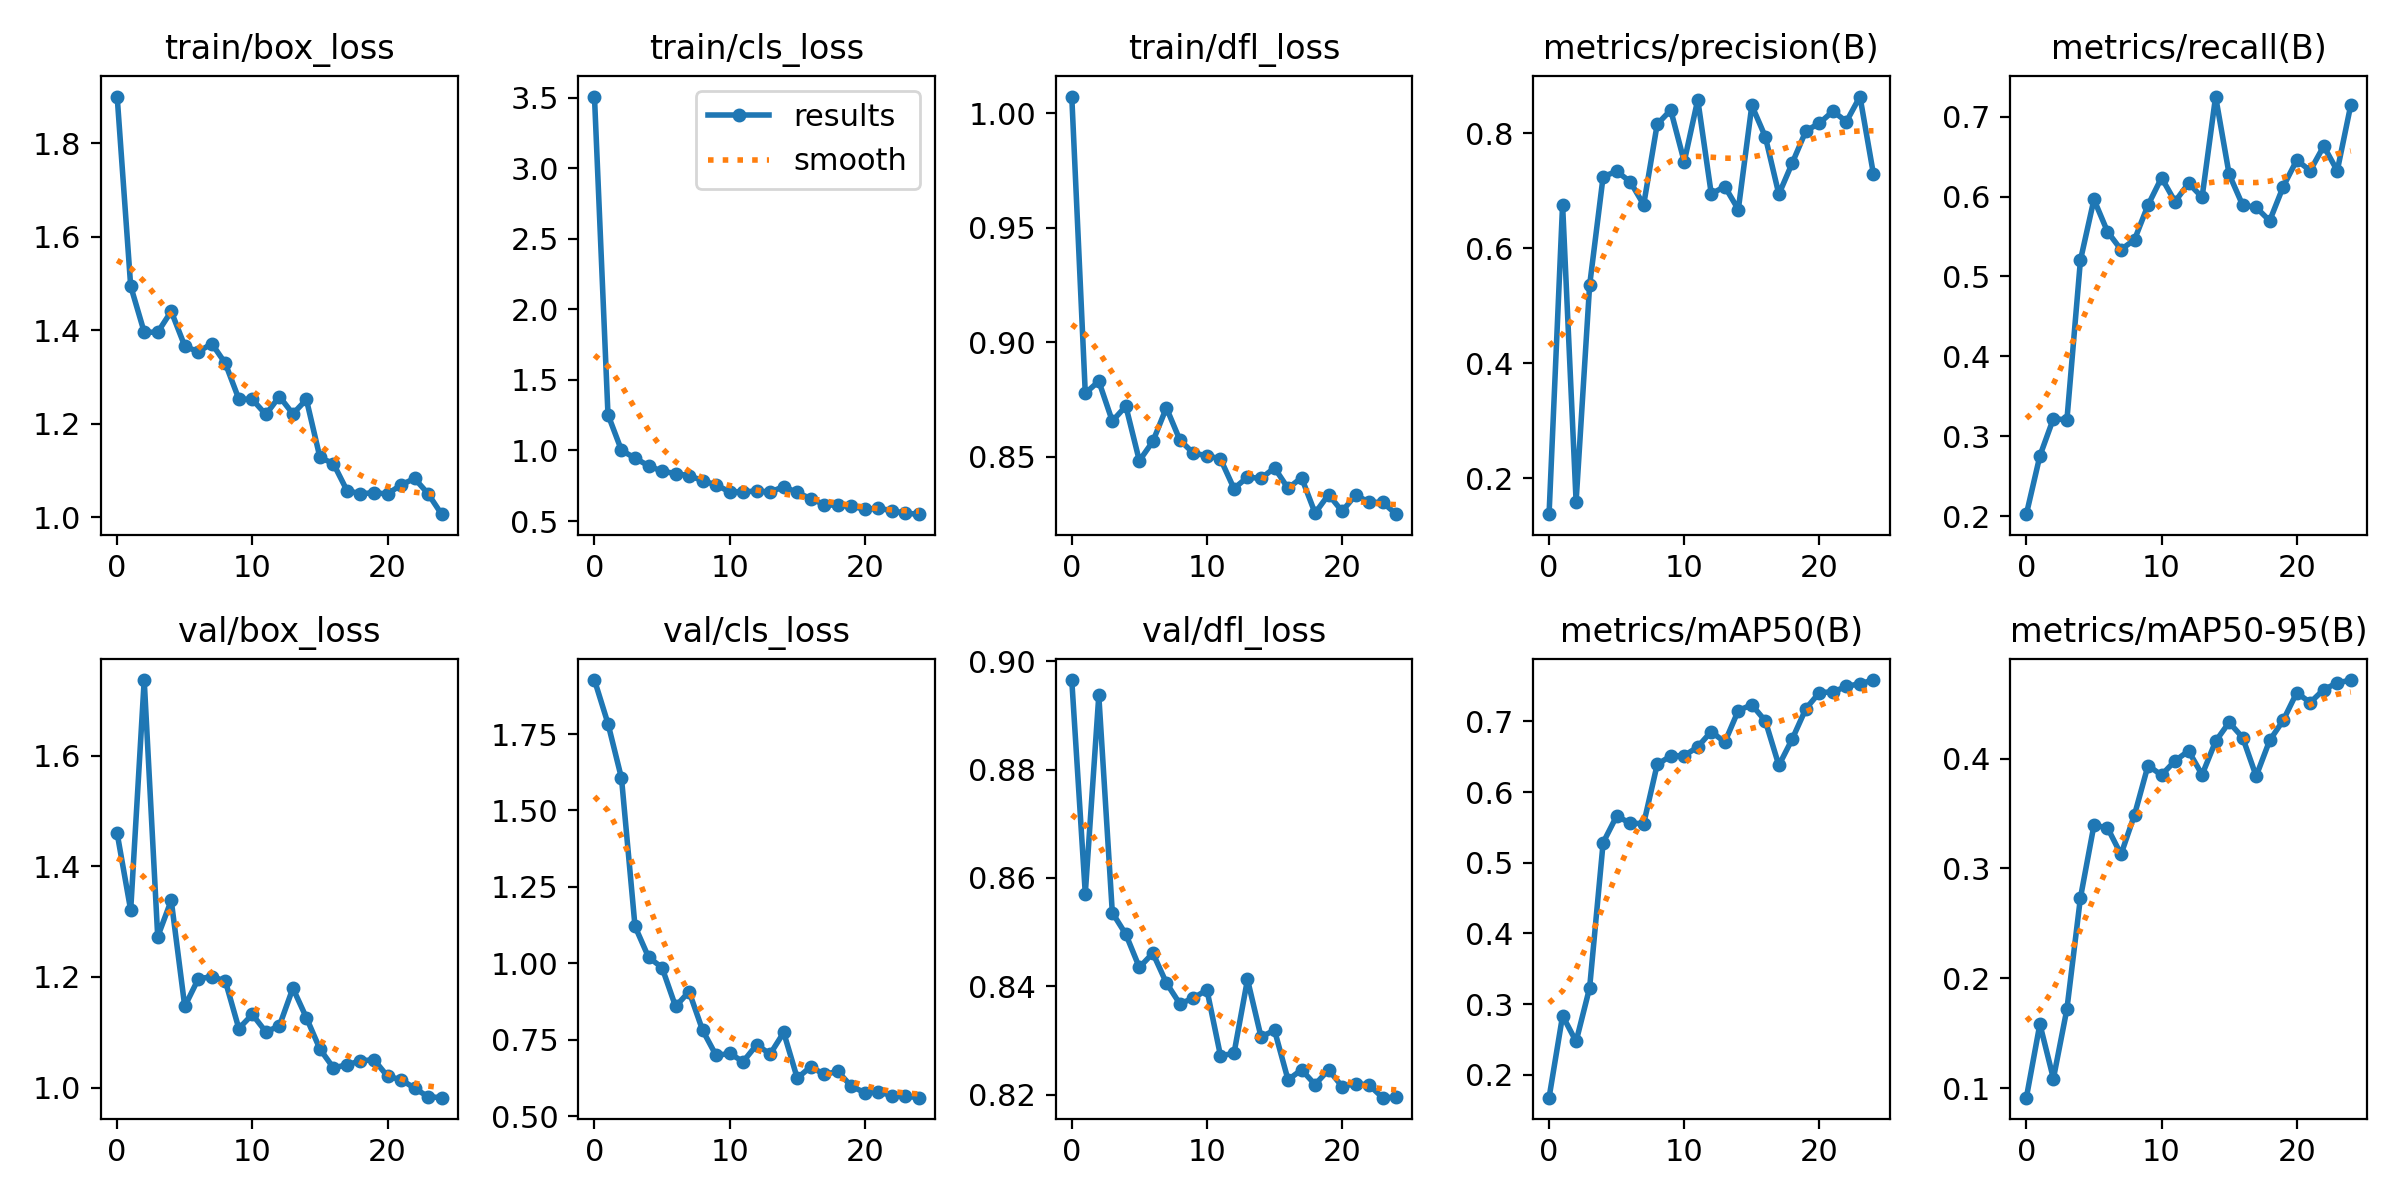

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


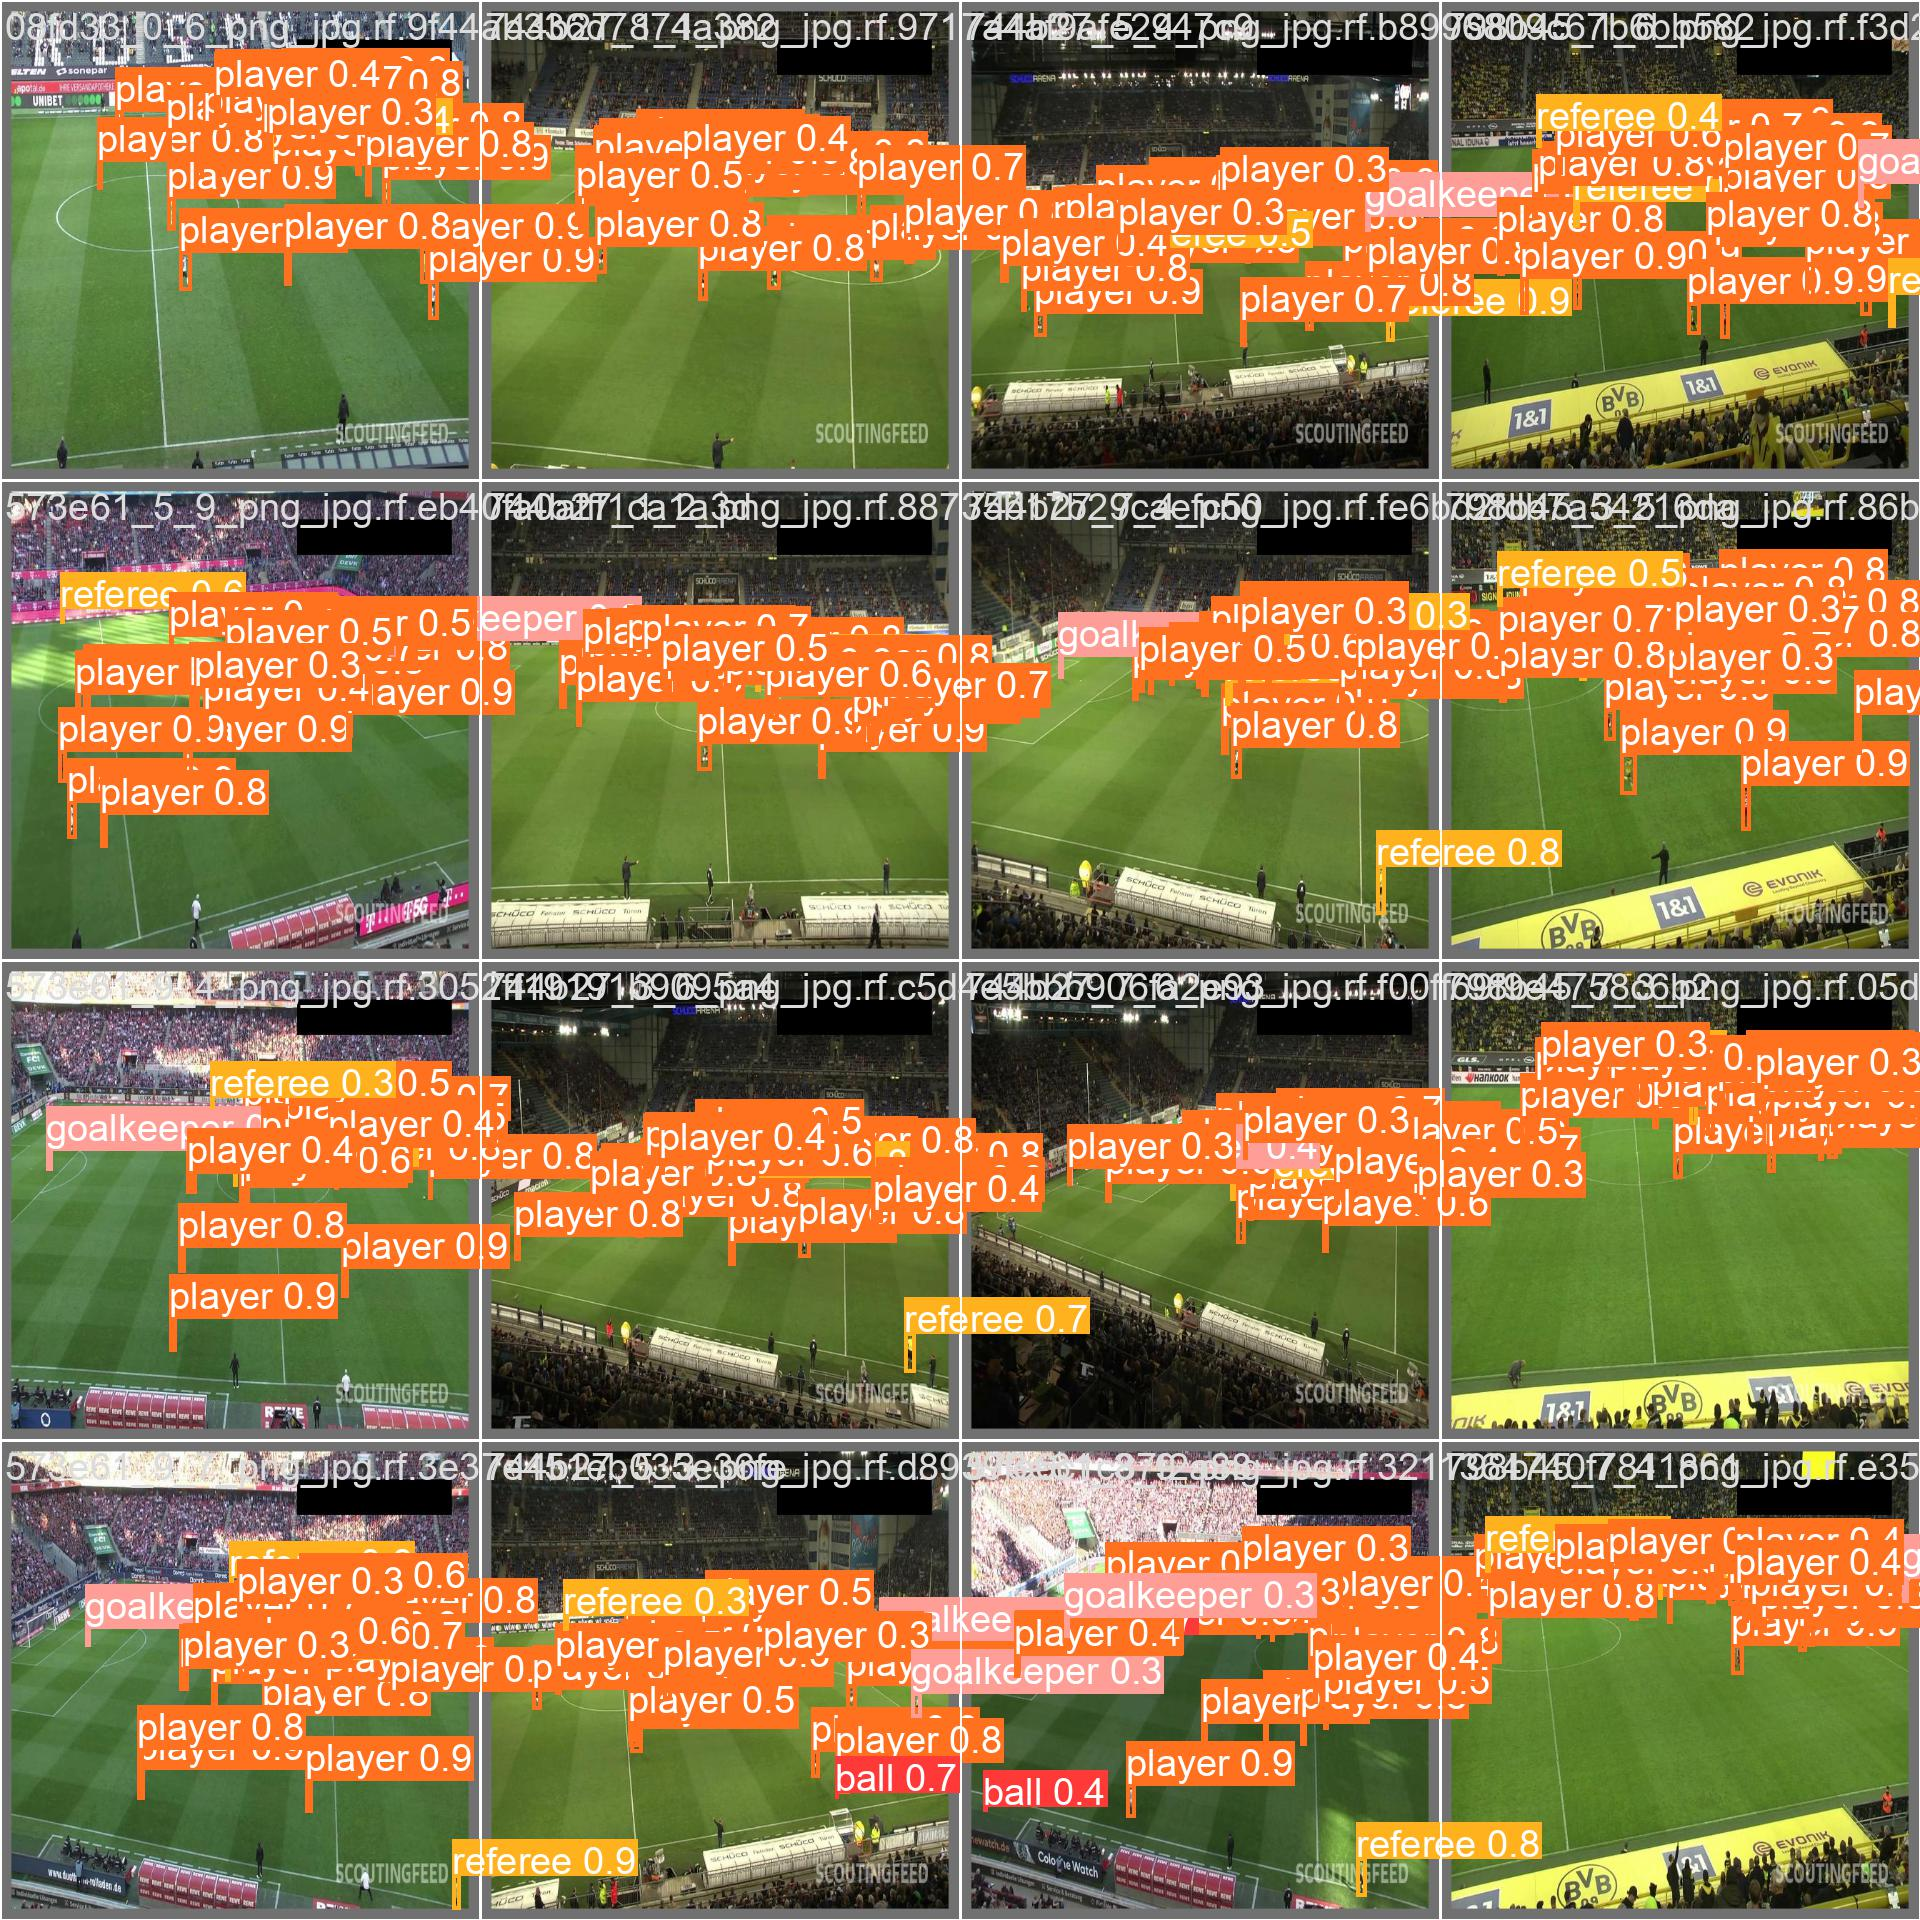

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

Validate Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/football-players-1/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100% 51/51 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.65s/it]
                   all         51       1221      0.722      0.729      0.768      0.473
                  ball         51         48      0.748      0.186      0.357     0.0881
            goalkeeper         51         38      0.732      0.933      0.947      0.621
                player         51       1021      0.823      0.975      0.978      0.694
               referee         51        114      0.585      0.825       0.79      0.487
Speed: 16.7ms preprocess, 35.9ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val


Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/25 /content/football-players-1/test/images/08fd33_0_5_png_jpg.rf.ea471dc8a42d588c0c75fc1d4d996dc5.jpg: 640x640 21 players, 1 referee, 16.3ms
image 2/25 /content/football-players-1/test/images/08fd33_3_2_png_jpg.rf.cb99cc5e8e246a508f7ffcbe98b45cbf.jpg: 640x640 21 players, 1 referee, 16.3ms
image 3/25 /content/football-players-1/test/images/08fd33_6_4_png_jpg.rf.7c62ce61c88e5cf246936bcbbaa86559.jpg: 640x640 20 players, 2 referees, 16.2ms
image 4/25 /content/football-players-1/test/images/08fd33_9_8_png_jpg.rf.0b7bb3d41fb6b17a7f08e6058bf3a309.jpg: 640x640 23 players, 2 referees, 16.2ms
image 5/25 /content/football-players-1/test/images/2e57b9_9_7_png_jpg.rf.dd914fa6f6e360ba988b554362f2a954.jpg: 640x640 18 players, 4 referees, 16.2ms
image 6/25 /content/football-players-1/test/images/42ba34_1_3_png_jpg.rf.733e2d8c55b54

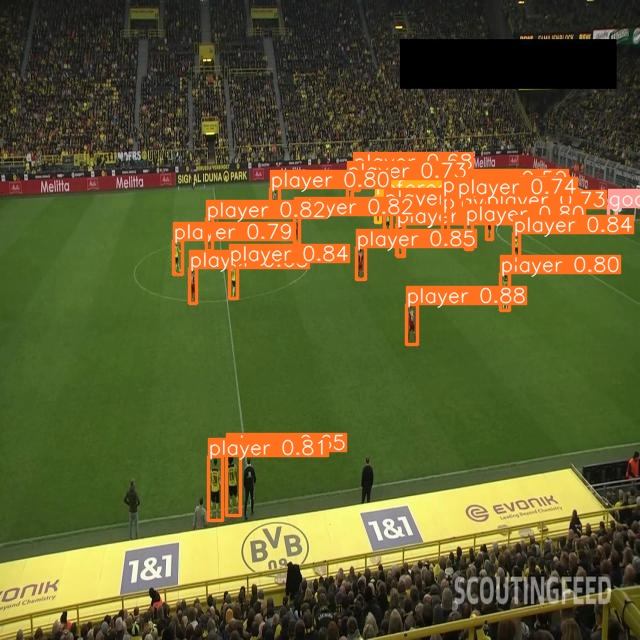

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:1]:
  display(Image(filename=image_path, width = 600))
  print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train/weights/best.pt \
conf=0.25 \
source=/content/1.mp4

Se han truncado las últimas 5000 líneas del flujo de salida.
video 1/1 (3184/8181) /content/1.mp4: 384x640 2 balls, 10 players, 10.4ms
video 1/1 (3185/8181) /content/1.mp4: 384x640 1 ball, 8 players, 10.4ms
video 1/1 (3186/8181) /content/1.mp4: 384x640 1 ball, 10 players, 10.4ms
video 1/1 (3187/8181) /content/1.mp4: 384x640 1 ball, 9 players, 10.4ms
video 1/1 (3188/8181) /content/1.mp4: 384x640 1 ball, 8 players, 10.4ms
video 1/1 (3189/8181) /content/1.mp4: 384x640 9 players, 10.4ms
video 1/1 (3190/8181) /content/1.mp4: 384x640 11 players, 10.4ms
video 1/1 (3191/8181) /content/1.mp4: 384x640 9 players, 10.4ms
video 1/1 (3192/8181) /content/1.mp4: 384x640 7 players, 10.4ms
video 1/1 (3193/8181) /content/1.mp4: 384x640 9 players, 10.3ms
video 1/1 (3194/8181) /content/1.mp4: 384x640 9 players, 10.4ms
video 1/1 (3195/8181) /content/1.mp4: 384x640 9 players, 10.8ms
video 1/1 (3196/8181) /content/1.mp4: 384x640 1 ball, 8 players, 10.8ms
video 1/1 (3197/8181) /content/1.mp4: 384x640 1 ball, 1

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path = f'{HOME}/runs/detect/train/')

Dependency ultralytics<=8.0.20 is required but found version=8.0.135, to fix: `pip install ultralytics<=8.0.20`
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
